In [1]:
path = './dataset.txt'

In [4]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [5]:
import json
# convert json to python dictionary
records = [json.loads(line) for line in open(path)]

In [9]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [11]:
# time zones for the first records
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [13]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [22]:
# returns the count for timezones using default_dict
# defaultdict doesn't throw keyError when key not present
# instead initializes it to a default variable
from collections import defaultdict

def get_count_timezones(tzones):
    count_time_zone = defaultdict(int) 
    for tzone in tzones:
        count_time_zone[tzone] += 1
    return count_time_zone

In [23]:
counts = get_count_timezones(time_zones)

In [24]:
counts['America/New_York']

1251

In [25]:
counts['America/Denver']

191

In [27]:
counts['Europe/Warsaw']

16

In [28]:
# total timezone entries
len(time_zones)

3440

In [47]:
# top 15 counts (timezones)
def top_15_counts(count_dict, n=15):
    key_value_pairs = [(count, tz) for tz, count in count_dict.items()]
    key_value_pairs.sort()
    return key_value_pairs[-n:]

In [48]:
top_15_counts(counts)

[(20, 'America/Phoenix'),
 (22, 'Europe/Amsterdam'),
 (25, 'America/Rainy_River'),
 (27, 'Europe/Rome'),
 (28, 'Europe/Berlin'),
 (33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [50]:
# top 15 counts (timezones) using Counter
from collections import Counter
counts = Counter(time_zones)
counts.most_common(15)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33),
 ('Europe/Berlin', 28),
 ('Europe/Rome', 27),
 ('America/Rainy_River', 25),
 ('Europe/Amsterdam', 22),
 ('America/Phoenix', 20)]

In [51]:
import pandas as pd

In [53]:
frame = pd.DataFrame(records)

In [54]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [58]:
frame['a'][:10]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [59]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [60]:
tz_counts = frame['tz'].value_counts()

In [63]:
tz_counts[:20]

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
Europe/London             74
Asia/Tokyo                37
Pacific/Honolulu          36
Europe/Madrid             35
America/Sao_Paulo         33
Europe/Berlin             28
Europe/Rome               27
America/Rainy_River       25
Europe/Amsterdam          22
America/Phoenix           20
America/Indianapolis      20
Europe/Warsaw             16
America/Mexico_City       15
Europe/Paris              14
Europe/Stockholm          14
Name: tz, dtype: int64

In [68]:
clean_tz = frame['tz'].fillna('NA')

In [69]:
clean_tz[clean_tz == ''] = 'Unknown'

In [70]:
tz_counts = clean_tz.value_counts()

In [71]:
tz_counts[:20]

America/New_York        1251
Unknown                  521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
NA                       120
Europe/London             74
Asia/Tokyo                37
Pacific/Honolulu          36
Europe/Madrid             35
America/Sao_Paulo         33
Europe/Berlin             28
Europe/Rome               27
America/Rainy_River       25
Europe/Amsterdam          22
America/Indianapolis      20
America/Phoenix           20
Europe/Warsaw             16
America/Mexico_City       15
Europe/Stockholm          14
Name: tz, dtype: int64

In [73]:
clean_c = frame['c'].fillna('NA')

In [74]:
clean_c[clean_c == ''] = 'Unknown'

In [75]:
c_counts = clean_c.value_counts()

In [76]:
c_counts[:20]

US    2305
NA     641
GB      74
CA      60
ES      37
JP      37
BR      35
DE      28
IT      27
NL      22
MX      19
PL      16
SE      14
FR      14
RU      13
NZ      11
PR      10
NO      10
CZ      10
HK      10
Name: c, dtype: int64

In [78]:
# seaborn provides It provides a high-level interface for drawing 
# attractive and informative statistical graphics.
import seaborn as sns
subset = tz_counts[:10]

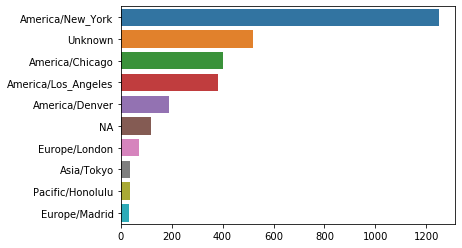

In [79]:
sns.barplot(y=subset.index, x=subset.values)

In [84]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [85]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [86]:
frame['a'][50][:50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/2010'

In [87]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [88]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [89]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [90]:
cframe = frame[frame.a.notnull()]

In [91]:
import numpy as np

In [92]:
# find if windows / non-windows
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Non-Windows')

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
cframe['os'][:5]

0        Windows
1    Non-Windows
2        Windows
3    Non-Windows
4        Windows
Name: os, dtype: object

In [94]:
# group os according to time zones
by_tz_os = cframe.groupby(['tz', 'os'])

In [95]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Non-Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [111]:
indexer = agg_counts.sum(1).argsort()

In [112]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [113]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Non-Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [114]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [115]:
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Non-Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Non-Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Non-Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Non-Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Non-Windows,43.0
9,Europe/London,Windows,31.0


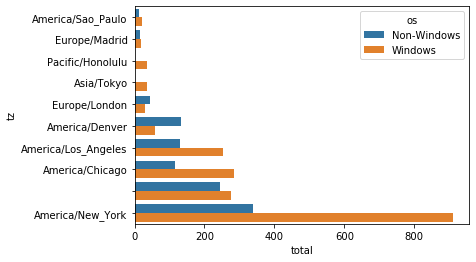

In [116]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)